In [1]:
#Problem 1a
##
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Load and preprocess the data
data = pd.read_csv('assets/Housing.csv')
X = data.drop('price', axis=1)
y = data['price']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)

#send tensors to gpu
X_train = X_train.cuda()
y_train = y_train.cuda()
X_val = X_val.cuda()
y_val = y_val.cuda()

# Define the neural network
class HousingNN(nn.Module):
    def __init__(self, input_size):
        super(HousingNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 8)  # Hidden layer with 8 nodes
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)  # Output layer
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = HousingNN(input_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#send model to gpu
model = model.cuda()

# Training loop
num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)
    
    # Validation set predictions
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)
    
    # Calculate metrics for training set
    train_pred = train_outputs.cpu().numpy()
    train_true = y_train.cpu().numpy()
    train_r2 = 1 - np.sum((train_true - train_pred) ** 2) / np.sum((train_true - train_true.mean()) ** 2)
    train_mae = np.mean(np.abs(train_true - train_pred))
    train_rmse = np.sqrt(np.mean((train_true - train_pred) ** 2))
    
    # Calculate metrics for validation set
    val_pred = val_outputs.cpu().numpy()
    val_true = y_val.cpu().numpy()
    val_r2 = 1 - np.sum((val_true - val_pred) ** 2) / np.sum((val_true - val_true.mean()) ** 2)
    val_mae = np.mean(np.abs(val_true - val_pred))
    val_rmse = np.sqrt(np.mean((val_true - val_pred) ** 2))

print(f'\nTraining Time: {training_time:.2f} seconds')
print('\nTraining Set Metrics:')
print(f'MSE Loss: {train_loss.item():.4f}')
print(f'R-squared: {train_r2:.4f}')
print(f'MAE: {train_mae:.4f}')
print(f'RMSE: {train_rmse:.4f}')

print('\nValidation Set Metrics:')
print(f'MSE Loss: {val_loss.item():.4f}')
print(f'R-squared: {val_r2:.4f}')
print(f'MAE: {val_mae:.4f}')
print(f'RMSE: {val_rmse:.4f}')


Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


Epoch [10/1000], Train Loss: 0.7242, Val Loss: 1.1038
Epoch [20/1000], Train Loss: 0.4965, Val Loss: 0.5675
Epoch [30/1000], Train Loss: 0.4130, Val Loss: 0.6132
Epoch [40/1000], Train Loss: 0.3857, Val Loss: 0.6050
Epoch [50/1000], Train Loss: 0.3581, Val Loss: 0.4952
Epoch [60/1000], Train Loss: 0.3590, Val Loss: 0.5598
Epoch [70/1000], Train Loss: 0.3509, Val Loss: 0.5459
Epoch [80/1000], Train Loss: 0.3251, Val Loss: 0.6398
Epoch [90/1000], Train Loss: 0.3588, Val Loss: 0.6417
Epoch [100/1000], Train Loss: 0.3674, Val Loss: 0.5856
Epoch [110/1000], Train Loss: 0.3268, Val Loss: 0.6588
Epoch [120/1000], Train Loss: 0.3068, Val Loss: 0.7020
Epoch [130/1000], Train Loss: 0.2802, Val Loss: 0.5823
Epoch [140/1000], Train Loss: 0.3050, Val Loss: 0.6411
Epoch [150/1000], Train Loss: 0.3189, Val Loss: 0.5997
Epoch [160/1000], Train Loss: 0.3119, Val Loss: 0.6644
Epoch [170/1000], Train Loss: 0.2977, Val Loss: 0.6535
Epoch [180/1000], Train Loss: 0.3214, Val Loss: 0.5854
Epoch [190/1000], T

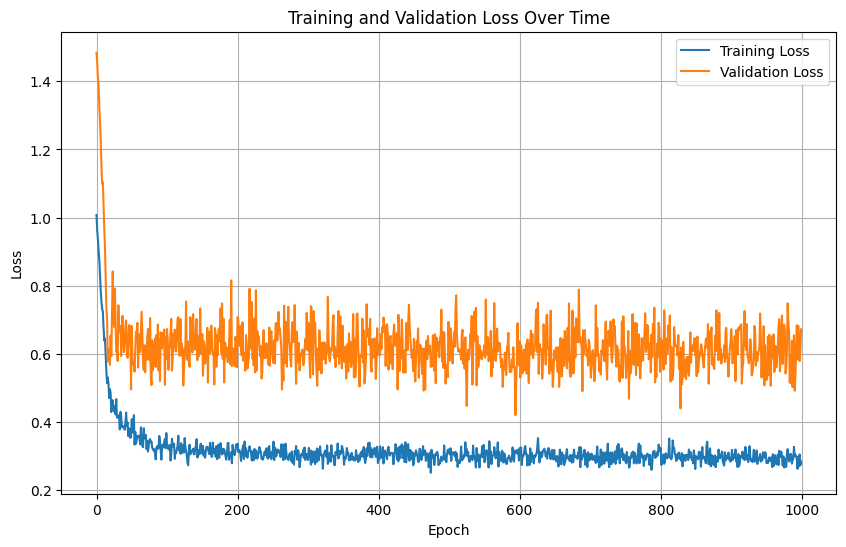

In [4]:
## Problem 1b
##

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('assets/Housing.csv')
X = data.drop('price', axis=1)
y = data['price']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)

#send tensors to gpu
X_train = X_train.cuda()
y_train = y_train.cuda()
X_val = X_val.cuda()
y_val = y_val.cuda()

# Define the neural network
class HousingNN(nn.Module):
    def __init__(self, input_size):
        super(HousingNN, self).__init__()
        # Layers
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.output_layer = nn.Linear(8, 1)  # No activation for regression output
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output_layer(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = HousingNN(input_size)
criterion = nn.MSELoss()
# Add weight decay (L2 regularization) to the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

#send model to gpu
model = model.cuda()

# Before training loop, add lists to store losses
train_losses = []
val_losses = []

# Training loop
num_epochs = 1000
start_time = time.time()

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Calculate the main loss
    main_loss = criterion(outputs, y_train)
    
    # Add L2 regularization term
    l2_lambda = 0.01  # Regularization strength
    l2_reg = torch.tensor(0., requires_grad=True).cuda()
    for param in model.parameters():
        l2_reg = l2_reg + torch.norm(param, 2)
    
    # Combined loss with regularization
    loss = main_loss + l2_lambda * l2_reg
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate validation loss
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        
    # Store losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)
    
    # Validation set predictions
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)
    
    # Calculate metrics for training set
    train_pred = train_outputs.cpu().numpy()
    train_true = y_train.cpu().numpy()
    train_r2 = 1 - np.sum((train_true - train_pred) ** 2) / np.sum((train_true - train_true.mean()) ** 2)
    train_mae = np.mean(np.abs(train_true - train_pred))
    train_rmse = np.sqrt(np.mean((train_true - train_pred) ** 2))
    
    # Calculate metrics for validation set
    val_pred = val_outputs.cpu().numpy()
    val_true = y_val.cpu().numpy()
    val_r2 = 1 - np.sum((val_true - val_pred) ** 2) / np.sum((val_true - val_true.mean()) ** 2)
    val_mae = np.mean(np.abs(val_true - val_pred))
    val_rmse = np.sqrt(np.mean((val_true - val_pred) ** 2))

print(f'\nTraining Time: {training_time:.2f} seconds')
print('\nTraining Set Metrics:')
print(f'MSE Loss: {train_loss.item():.4f}')
print(f'R-squared: {train_r2:.4f}')
print(f'MAE: {train_mae:.4f}')
print(f'RMSE: {train_rmse:.4f}')

print('\nValidation Set Metrics:')
print(f'MSE Loss: {val_loss.item():.4f}')
print(f'R-squared: {val_r2:.4f}')
print(f'MAE: {val_mae:.4f}')
print(f'RMSE: {val_rmse:.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
#problem 2a
##

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time

# Custom Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Neural Network class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
val_dataset = BreastCancerDataset(X_val_scaled, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BinaryClassifier(input_size=30).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
num_epochs = 1000
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        val_loss += loss.item()
        
        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {total_loss/len(train_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time

# Custom Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Neural Network class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
val_dataset = BreastCancerDataset(X_val_scaled, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BinaryClassifier(input_size=30).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        val_loss += loss.item()
        
        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {total_loss/len(train_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch [10/1000], Loss: 0.1316
Epoch [20/1000], Loss: 0.0754
Epoch [30/1000], Loss: 0.0564
Epoch [40/1000], Loss: 0.0476
Epoch [50/1000], Loss: 0.0433
Epoch [60/1000], Loss: 0.0349
Epoch [70/1000], Loss: 0.0308
Epoch [80/1000], Loss: 0.0254
Epoch [90/1000], Loss: 0.0218
Epoch [100/1000], Loss: 0.0273
Epoch [110/1000], Loss: 0.0169
Epoch [120/1000], Loss: 0.0206
Epoch [130/1000], Loss: 0.0115
Epoch [140/1000], Loss: 0.0097
Epoch [150/1000], Loss: 0.0094
Epoch [160/1000], Loss: 0.0086
Epoch [170/1000], Loss: 0.0067
Epoch [180/1000], Loss: 0.0060
Epoch [190/1000], Loss: 0.0067
Epoch [200/1000], Loss: 0.0044
Epoch [210/1000], Loss: 0.0040
Epoch [220/1000], Loss: 0.0036
Epoch [230/1000], Loss: 0.0032
Epoch [240/1000], Loss: 0.0031
Epoch [250/1000], Loss: 0.0030
Epoch [260/1000], Loss: 0.0030
Epoch [270/1000], Loss: 0.0020
Epoch [280/1000], Loss: 0.0019
Epoch [290/1000], Loss: 0.0017
Epoch [300/1000], Loss: 0.0015
Epoch [310/1000], Loss: 0.0014
Epoch [320/1000], Loss: 0.0013
Epoch [330/1000],

In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time

# Custom Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Updated Neural Network class
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.sigmoid(self.layer5(x))
        return x

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
val_dataset = BreastCancerDataset(X_val_scaled, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BinaryClassifier(input_size=30).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training
num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        val_loss += loss.item()
        
        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {total_loss/len(train_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch [10/1000], Loss: 0.0570
Epoch [20/1000], Loss: 0.0279
Epoch [30/1000], Loss: 0.0144
Epoch [40/1000], Loss: 0.0089
Epoch [50/1000], Loss: 0.0051
Epoch [60/1000], Loss: 0.0035
Epoch [70/1000], Loss: 0.0026
Epoch [80/1000], Loss: 0.0019
Epoch [90/1000], Loss: 0.0005
Epoch [100/1000], Loss: 0.0002
Epoch [110/1000], Loss: 0.0001
Epoch [120/1000], Loss: 0.0000
Epoch [130/1000], Loss: 0.0000
Epoch [140/1000], Loss: 0.0000
Epoch [150/1000], Loss: 0.0000
Epoch [160/1000], Loss: 0.0000
Epoch [170/1000], Loss: 0.0000
Epoch [180/1000], Loss: 0.0000
Epoch [190/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0000
Epoch [210/1000], Loss: 0.0000
Epoch [220/1000], Loss: 0.0000
Epoch [230/1000], Loss: 0.0000
Epoch [240/1000], Loss: 0.0000
Epoch [250/1000], Loss: 0.0000
Epoch [260/1000], Loss: 0.0000
Epoch [270/1000], Loss: 0.0000
Epoch [280/1000], Loss: 0.0000
Epoch [290/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [310/1000], Loss: 0.0000
Epoch [320/1000], Loss: 0.0000
Epoch [330/1000],

In [ ]:
#problem 3a
##

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 256)  # First and only hidden layer
        self.bn1 = nn.BatchNorm1d(256)          # Batch normalization
        self.fc2 = nn.Linear(256, 10)           # Output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create separate transforms for training and testing
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                        shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                       shuffle=False, num_workers=2)

# Initialize the network and define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
print(f"Training on {device}")
start_time = time.time()
losses = []

for epoch in range(100):
    net.train()  # Set network to training mode
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)
    
    # Evaluation phase
    net.eval()  # Set network to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}, Accuracy: {epoch_acc:.2f}%')

training_time = time.time() - start_time
print(f'Finished Training. Total time: {training_time:.2f} seconds')

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('training_loss.png')
plt.close()

# Save results to a file
with open('results.txt', 'w') as f:
    f.write(f'Training time: {training_time:.2f} seconds\n')
    f.write(f'Final training loss: {losses[-1]:.4f}\n')
    f.write(f'Test accuracy: {accuracy:.2f}%\n')


In [3]:

#problem 3b
##

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)  # Increased first layer size
        self.bn1 = nn.BatchNorm1d(512)        # Add batch normalization
        self.fc2 = nn.Linear(512, 256)          # New hidden layer
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)          # New hidden layer
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 10)           # Output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)          # Added dropout to combat overfitting

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Create separate transforms for training and testing
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                        shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                       shuffle=False, num_workers=2)

# Initialize the network and define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
print(f"Training on {device}")
start_time = time.time()
losses = []

for epoch in range(100):
    net.train()  # Set network to training mode
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)
    
    # Evaluation phase
    net.eval()  # Set network to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}, Accuracy: {epoch_acc:.2f}%')

training_time = time.time() - start_time
print(f'Finished Training. Total time: {training_time:.2f} seconds')

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('training_loss.png')
plt.close()

# Save results to a file
with open('results.txt', 'w') as f:
    f.write(f'Training time: {training_time:.2f} seconds\n')
    f.write(f'Final training loss: {losses[-1]:.4f}\n')
    f.write(f'Test accuracy: {accuracy:.2f}%\n')


Files already downloaded and verified
Files already downloaded and verified
Training on cuda


In [2]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_in_bytes = total_params * 4  # Assuming 32-bit floats
    size_in_megabytes = size_in_bytes / (1024 ** 2)
    return size_in_megabytes

model_size = get_model_size(net)
print(f'Model size: {model_size:.2f} MB')

NameError: name 'model' is not defined